<a href="https://colab.research.google.com/github/Karunya2655/GroupB_ZZSC9020/blob/main/GroupB_ZZSC9020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Mount Google Drive in Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Navigate to the Directory in Google Drive:

In [2]:
import os

project_path = '/content/drive/MyDrive/MyProject'  # Adjust the path according to your Drive structure
os.makedirs(project_path, exist_ok=True)  # Creates the directory if it doesn't exist
os.chdir(project_path)  # Changes the current working directory to the specified path


## 3. Clone the Repository into Drive

In [3]:
!git clone https://github.com/Karunya2655/GroupB_ZZSC9020.git

Cloning into 'GroupB_ZZSC9020'...
remote: Enumerating objects: 227, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 227 (delta 72), reused 117 (delta 61), pack-reused 73
Receiving objects: 100% (227/227), 206.81 MiB | 13.44 MiB/s, done.
Resolving deltas: 100% (86/86), done.
Updating files: 100% (34/34), done.


## 4. Working with the Repository:
Whenever we start a new Colab session and want to work with this repository, we need to mount the Google Drive and navigate to the repository's diorectory again.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
repo_path ='/content/drive/MyDrive/MyProject/GroupB_ZZSC9020'  # Adjust the path according to your Drive structure
os.chdir(repo_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Organising NSW Data
We will generate a ZIP file from the segmented part files of the forecast demand data for NSW. This process involves specifying a base filename for the final ZIP file and identifying the part files derived from the segmented data.

In [ ]:
base_filename = os.path.join(repo_path, 'data/NSW/forecastdemand_nsw.csv.zip')
part_filenames = [
    os.path.join(repo_path, 'data/NSW/forecastdemand_nsw.csv.zip.partaa'),
    os.path.join(repo_path, 'data/NSW/forecastdemand_nsw.csv.zip.partab')
]

with open(base_filename, 'wb') as output_file:
    for part_filename in part_filenames:
        with open(part_filename, 'rb') as input_file:
            output_file.write(input_file.read())

if os.path.exists(base_filename):
    print(f"Successfully combined the parts into {base_filename}")
    # Extract the ZIP file
    import zipfile
    with zipfile.ZipFile(base_filename, 'r') as zip_ref:
        zip_ref.extractall('.')
    print(f"Contents of {base_filename} have been extracted.")
else:
    print("Failed to combine ZIP parts.")

Successfully combined the parts into /content/drive/MyDrive/MyProject/GroupB_ZZSC9020/data/NSW/forecastdemand_nsw.csv.zip
Contents of /content/drive/MyDrive/MyProject/GroupB_ZZSC9020/data/NSW/forecastdemand_nsw.csv.zip have been extracted.


Importing zipfile module which is necessary for handline ZIP archive files. It provides a set of tools to create, read, write, append, and list a ZIP file's contents. When working with ZIP files, such as compressing files into a ZIP archive or extracting files from a ZIP archive, this module becomes indispensable due to its comprehensive functionality and ease of use.

In [ ]:
import zipfile

## Extracting all data for NSW

In [ ]:
zip_forecastdemand_nsw = os.path.join(repo_path, 'data/NSW/forecastdemand_nsw.csv.zip')
zip_temperature_nsw = os.path.join(repo_path, 'data/NSW/temperature_nsw.csv.zip')
zip_totaldemand_nsw = os.path.join(repo_path, 'data/NSW/totaldemand_nsw.csv.zip')

extract_directory = os.path.join(repo_path, 'data/NSW/')

for zip_file in [zip_forecastdemand_nsw, zip_temperature_nsw, zip_totaldemand_nsw]:
    if os.path.exists(zip_file):
        with zipfile.ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extractall(extract_directory)
            print(f"Extracted {zip_file} into {extract_directory}")
    else:
        print(f"The file {zip_file} does not exist.")

In [ ]:
import pandas as pd
import numpy as np

Locate and load the datasets and displaying the first few rows of each dataframe to verify

In [ ]:
# Locate the data set
csv_forecast_nsw = os.path.join(repo_path, 'data/NSW/forecastdemand_nsw.csv')
csv_temperature_nsw = os.path.join(repo_path, 'data/NSW/temperature_nsw.csv')
csv_totaldemand_nsw = os.path.join(repo_path, 'data/NSW/totaldemand_nsw.csv')

# Load the datasets
df_forecast_nsw = pd.read_csv(csv_forecast_nsw, parse_dates=['DATETIME'], dayfirst=True)
df_temperature_nsw = pd.read_csv(csv_temperature_nsw, parse_dates=['DATETIME'], dayfirst=True)
df_totaldemand_nsw = pd.read_csv(csv_totaldemand_nsw, parse_dates=['DATETIME'], dayfirst=True)

# Display the first few rows of each dataframe to verify
print("Forecast Demand Head:")
print(df_forecast_nsw.head())
print("\nTemperature Data Head:")
print(df_temperature_nsw.head())
print("\nTotal Electricity Demand Head:")
print(df_totaldemand_nsw.head())

Forecast Demand Head:
   PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND          LASTCHANGED  \
0        2009123018     NSW1        71         7832.04  2009-12-30 12:31:49   
1        2009123019     NSW1        70         7832.04  2009-12-30 13:01:43   
2        2009123020     NSW1        69         7832.03  2009-12-30 13:31:36   
3        2009123021     NSW1        68         7832.03  2009-12-30 14:01:44   
4        2009123022     NSW1        67         7830.96  2009-12-30 14:31:35   

    DATETIME  
0 2010-01-01  
1 2010-01-01  
2 2010-01-01  
3 2010-01-01  
4 2010-01-01  

Temperature Data Head:
    LOCATION            DATETIME  TEMPERATURE
0  Bankstown 2010-01-01 00:00:00         23.1
1  Bankstown 2010-01-01 00:01:00         23.1
2  Bankstown 2010-01-01 00:30:00         22.9
3  Bankstown 2010-01-01 00:50:00         22.7
4  Bankstown 2010-01-01 01:00:00         22.6

Total Electricity Demand Head:
             DATETIME  TOTALDEMAND REGIONID
0 2010-01-01 00:00:00      8038.00   

## a. Consolidate Data Source
Let's resample the total electricity demand and temperature data to half-hourly intervals if they're not already. Since the forecast demand is already in half-hourly increments, it might not need resampling. For the resampling, typically averaging the measurements within each half-hour period for the temperature, and sum or average for the total demand, depending on the nature of the data.

In [ ]:
# Resample temperature data to half-hourly, using the mean for each period, considering only numeric columns
df_temperature_resampled = df_temperature_nsw.set_index('DATETIME').resample('30T').mean(numeric_only=True).reset_index()

# Similar for total demand, specify numeric_only=True to avoid future warnings
df_totaldemand_resampled = df_totaldemand_nsw.set_index('DATETIME').resample('30T').mean(numeric_only=True).reset_index()

# Verify the resampling
print("\nResampled Temperature Data Head:")
print(df_temperature_resampled.head())
print("\nResampled Total Electricity Demand Head:")
print(df_totaldemand_resampled.head())



Resampled Temperature Data Head:
             DATETIME  TEMPERATURE
0 2010-01-01 00:00:00         23.1
1 2010-01-01 00:30:00         22.8
2 2010-01-01 01:00:00         22.6
3 2010-01-01 01:30:00         22.5
4 2010-01-01 02:00:00         22.5

Resampled Total Electricity Demand Head:
             DATETIME  TOTALDEMAND
0 2010-01-01 00:00:00      8038.00
1 2010-01-01 00:30:00      7809.31
2 2010-01-01 01:00:00      7483.69
3 2010-01-01 01:30:00      7117.23
4 2010-01-01 02:00:00      6812.03


### b. Handline Missing Values
Let's check for null values and apply pandas interpolation for each missing values by taking the mean of the previous and next values. This approach is a form of linear interpolation and is suitable for time series data where missing values are expected to follow the trend of the neighboring points.

In [ ]:
# Check for missing values in each dataframe
df_forecast_nsw.info()
df_temperature_nsw.info()
df_totaldemand_nsw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10906019 entries, 0 to 10906018
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   PREDISPATCHSEQNO  int64         
 1   REGIONID          object        
 2   PERIODID          int64         
 3   FORECASTDEMAND    float64       
 4   LASTCHANGED       object        
 5   DATETIME          datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 499.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220326 entries, 0 to 220325
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   LOCATION     220326 non-null  object        
 1   DATETIME     220326 non-null  datetime64[ns]
 2   TEMPERATURE  220326 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196513 entries, 0 

# Testing Australia Data
We have 4 zip file for the Australia data. Let's extract all zip file containing in this folder on Extract folder.

In [ ]:
base_directory_au = os.path.join(repo_path, 'data/Australia')
extract_directory_au = os.path.join(base_directory_au, 'Extract')

zip_files = ['a.zip', 'b.zip', 'c.zip', 'd.zip']
os.makedirs(extract_directory_au, exist_ok=True)

for zip_file in zip_files:
    zip_file_path = os.path.join(base_directory_au, zip_file)

    if os.path.exists(zip_file_path):
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_directory_au)
            print(f"Extracted {zip_file} into {extract_directory_au}")
    else:
        print(f"The file {zip_file_path} does not exist.")

Let's read all csv data from the Extract folder

In [ ]:
base_directory_au_extract = os.path.join(repo_path, 'data/Australia/Extract')

subdirectories = ['a', 'b', 'c', 'd']

# Iterate over each subdirectory
for subdir in subdirectories:
    subdir_path = os.path.join(base_directory_au_extract, subdir)

    csv_files = [f for f in os.listdir(subdir_path) if f.endswith('.csv')]

    for csv_file in csv_files:
        csv_file_path = os.path.join(subdir_path, csv_file)

        print(f"Showing head of {csv_file} in {subdir} folder:")
        df = pd.read_csv(csv_file_path)
        print(df.head(), '\n')

Showing head of forecastdemand_vic.csv in a folder:
   PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND          LASTCHANGED  \
0        2016123018     VIC1        71         4160.74  2016-12-30 12:31:25   
1        2016123018     VIC1        72         3999.64  2016-12-30 12:31:25   
2        2016123018     VIC1        73         3836.30  2016-12-30 12:31:25   
3        2016123018     VIC1        74         3681.87  2016-12-30 12:31:25   
4        2016123018     VIC1        75         3457.38  2016-12-30 12:31:25   

              DATETIME  
0  2017-01-01 00:00:00  
1  2017-01-01 00:30:00  
2  2017-01-01 01:00:00  
3  2017-01-01 01:30:00  
4  2017-01-01 02:00:00   

Showing head of forecastdemand_sa.csv in b folder:
   PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND          LASTCHANGED  \
0        2016123018      SA1        71         1394.41  2016-12-30 12:31:25   
1        2016123018      SA1        72         1285.07  2016-12-30 12:31:25   
2        2016123018      SA1     

In [ ]:
import matplotlib.pyplot as plt

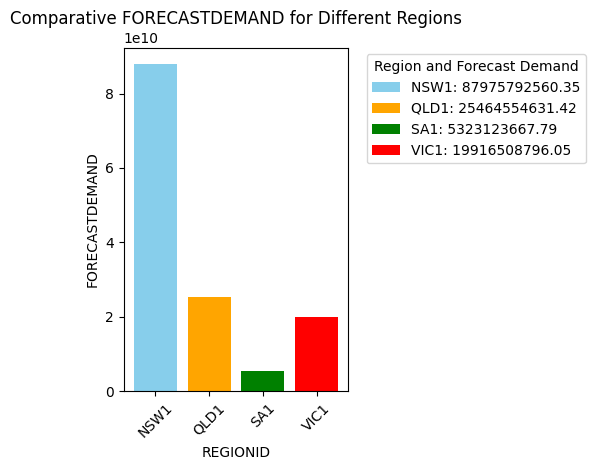

In [ ]:
subdirectories_forecast = ['a', 'b', 'c']

aggregate_data = pd.DataFrame()

# Iterate over each subdirectory and append data from each CSV file
for subdir in subdirectories_forecast:
    subdir_path = os.path.join(base_directory_au_extract, subdir)
    csv_files = [f for f in os.listdir(subdir_path) if f.endswith('.csv')]

    for csv_file in csv_files:
        csv_file_path = os.path.join(subdir_path, csv_file)

        # Read the CSV file and append it to the aggregate data
        df = pd.read_csv(csv_file_path)
        aggregate_data = pd.concat([aggregate_data, df])

# Append NSW data to the aggregate data
aggregate_data = pd.concat([aggregate_data, df_forecast_nsw])

# Group data by REGIONID and sum the FORECASTDEMAND
grouped_data = aggregate_data.groupby('REGIONID')['FORECASTDEMAND'].sum().reset_index()
colors = ['skyblue', 'orange', 'green', 'red']

# Plot each bar individually and create custom legends
for index, row in grouped_data.iterrows():
    plt.bar(row['REGIONID'], row['FORECASTDEMAND'], color=colors[index], label=f"{row['REGIONID']}: {row['FORECASTDEMAND']}")

plt.xlabel('REGIONID')
plt.ylabel('FORECASTDEMAND')
plt.title('Comparative FORECASTDEMAND for Different Regions')
plt.xticks(rotation=45)

# Adding legend outside the plot
plt.legend(title="Region and Forecast Demand", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [ ]:
# We can't push because of GitHub size limit to 100MB

# !git config --global user.email "mail.santoshban@gmail.com"
# !git config --global user.name "santoshban"
# !git status
# !git add .
# !git commit -m "Some message"
# !git remote set-url origin https://santoshban:<PAT>@github.com/Karunya2655/GroupB_ZZSC9020.git
# !git push origin main


#Importing libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates
import datetime
import seaborn as sns
#sns.set()

# Importing the Data

In [ ]:
url_demand = os.path.join(repo_path, 'data/NSW/totaldemand_nsw.csv')
raw_nsw_demand = pd.read_csv(url_demand, sep=',')#,index_col="DATETIME")

In [ ]:
nswdemand_full = raw_nsw_demand.copy()

In [ ]:
url_temperature = os.path.join(repo_path, 'data/NSW/temperature_nsw.csv')
raw_nsw_temperature = pd.read_csv(url_temperature, sep=',')#,index_col="DATETIME")
#on_bad_lines='warn'

Creating a copy of the raw data in case we need the full data at some point.

In [ ]:
nswdemand_full = raw_nsw_demand.copy()

In [ ]:
nswtemp_full = raw_nsw_temperature.copy()

# Examining the Data

In [ ]:
nswdemand_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196513 entries, 0 to 196512
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   DATETIME     196513 non-null  object 
 1   TOTALDEMAND  196513 non-null  float64
 2   REGIONID     196513 non-null  object 
dtypes: float64(1), object(2)
memory usage: 4.5+ MB


In [ ]:
nswtemp_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220326 entries, 0 to 220325
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   LOCATION     220326 non-null  object 
 1   DATETIME     220326 non-null  object 
 2   TEMPERATURE  220326 non-null  float64
dtypes: float64(1), object(2)
memory usage: 5.0+ MB


Seeing what the dataframes looks like

In [ ]:
nswdemand_full.head()

,DATETIME,TOTALDEMAND,REGIONID
0,1/01/2010 0:00,8038.00,NSW1
1,1/01/2010 0:30,7809.31,NSW1
2,1/01/2010 1:00,7483.69,NSW1
3,1/01/2010 1:30,7117.23,NSW1
4,1/01/2010 2:00,6812.03,NSW1


In [ ]:
nswtemp_full.head()

,LOCATION,DATETIME,TEMPERATURE
0,Bankstown,1/1/2010 0:00,23.1
1,Bankstown,1/1/2010 0:01,23.1
2,Bankstown,1/1/2010 0:30,22.9
3,Bankstown,1/1/2010 0:50,22.7
4,Bankstown,1/1/2010 1:00,22.6


In order to explore the data, it will be beneficial to have the year, month and day information extracted from the datetime column.

Let's check the format of the date time column in the Temperature table.

In [ ]:
nswtemp_full["DATETIME"]

0           1/1/2010 0:00
1           1/1/2010 0:01
2           1/1/2010 0:30
3           1/1/2010 0:50
4           1/1/2010 1:00
               ...       
220321    17/3/2021 23:00
220322    17/3/2021 23:20
220323    17/3/2021 23:30
220324    17/3/2021 23:34
220325     18/3/2021 0:00
Name: DATETIME, Length: 220326, dtype: object

Since the DATETIME column is of type "object", we need to convert it to Date Time format first.

In [ ]:
nswtemp_full["DATETIME"] = pd.to_datetime(nswtemp_full["DATETIME"])
nswtemp_full["DATETIME"]

0        2010-01-01 00:00:00
1        2010-01-01 00:01:00
2        2010-01-01 00:30:00
3        2010-01-01 00:50:00
4        2010-01-01 01:00:00
                 ...        
220321   2021-03-17 23:00:00
220322   2021-03-17 23:20:00
220323   2021-03-17 23:30:00
220324   2021-03-17 23:34:00
220325   2021-03-18 00:00:00
Name: DATETIME, Length: 220326, dtype: datetime64[ns]

Now we have the DATETIME column in Date time format, we can extract the year, month and day from DATETIME.

In [ ]:
nswtemp_full["date"] = nswtemp_full["DATETIME"].dt.date
nswtemp_full["year"] = nswtemp_full["DATETIME"].dt.year
nswtemp_full["month"] = nswtemp_full["DATETIME"].dt.month
nswtemp_full["day"] = nswtemp_full["DATETIME"].dt.day
nswtemp_full['month_year'] = nswtemp_full['DATETIME'].dt.to_period('M')
nswtemp_full["Q"] = nswtemp_full["DATETIME"].dt.quarter
nswtemp_full["Dayofmonth"] = nswtemp_full["DATETIME"].dt.day
nswtemp_full["Day"] = nswtemp_full["DATETIME"].dt.dayofweek
nswtemp_full["Hour"] = nswtemp_full["DATETIME"].dt.hour
nswtemp_full.head(5)

,LOCATION,DATETIME,TEMPERATURE,date,year,month,day,month_year,Q,Dayofmonth,Day,Hour
0,Bankstown,2010-01-01 00:00:00,23.1,2010-01-01,2010,1,1,2010-01,1,1,4,0
1,Bankstown,2010-01-01 00:01:00,23.1,2010-01-01,2010,1,1,2010-01,1,1,4,0
2,Bankstown,2010-01-01 00:30:00,22.9,2010-01-01,2010,1,1,2010-01,1,1,4,0
3,Bankstown,2010-01-01 00:50:00,22.7,2010-01-01,2010,1,1,2010-01,1,1,4,0
4,Bankstown,2010-01-01 01:00:00,22.6,2010-01-01,2010,1,1,2010-01,1,1,4,1


Extracting the Year, Month and Day for the Demand table.

In [ ]:
nswdemand_full["DATETIME"] = pd.to_datetime(nswtemp_full["DATETIME"])
nswdemand_full["DATETIME"]

0        2010-01-01 00:00:00
1        2010-01-01 00:01:00
2        2010-01-01 00:30:00
3        2010-01-01 00:50:00
4        2010-01-01 01:00:00
                 ...        
196508   2020-06-01 03:00:00
196509   2020-06-01 03:30:00
196510   2020-06-01 04:00:00
196511   2020-06-01 04:30:00
196512   2020-06-01 05:00:00
Name: DATETIME, Length: 196513, dtype: datetime64[ns]

In [ ]:
nswdemand_full["date"] = nswdemand_full["DATETIME"].dt.date
nswdemand_full["year"] = nswdemand_full["DATETIME"].dt.year
nswdemand_full["month"] = nswdemand_full["DATETIME"].dt.month
nswdemand_full["day"] = nswdemand_full["DATETIME"].dt.day
nswdemand_full['month_year'] = nswdemand_full['DATETIME'].dt.to_period('M')
nswdemand_full["Q"] = nswdemand_full["DATETIME"].dt.quarter
nswdemand_full["Dayofmonth"] = nswdemand_full["DATETIME"].dt.day
nswdemand_full["Day"] = nswdemand_full["DATETIME"].dt.dayofweek
nswdemand_full["Hour"] = nswdemand_full["DATETIME"].dt.hour
nswdemand_full.head(5)

,DATETIME,TOTALDEMAND,REGIONID,date,year,month,day,month_year,Q,Dayofmonth,Day,Hour
DATETIME,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,9844.68,NSW1,2011-01-01,2011,1,1,2011-01,1,1,5,0
2011-01-01 00:00:00,2011-01-01 00:00:00,9445.48,NSW1,2011-01-01,2011,1,1,2011-01,1,1,5,0
2011-01-01 00:30:00,2011-01-01 00:30:00,9029.73,NSW1,2011-01-01,2011,1,1,2011-01,1,1,5,0
2011-01-01 01:00:00,2011-01-01 01:00:00,8810.84,NSW1,2011-01-01,2011,1,1,2011-01,1,1,5,1
2011-01-01 01:30:00,2011-01-01 01:30:00,8570.16,NSW1,2011-01-01,2011,1,1,2011-01,1,1,5,1


Checking Demand and Temperature for missing values

In [ ]:
nswdemand_full.isna().sum()

DATETIME       0
TOTALDEMAND    0
REGIONID       0
date           0
year           0
month          0
day            0
month_year     0
dtype: int64

In [ ]:
nswtemp_full.isna().sum()

LOCATION       0
DATETIME       0
TEMPERATURE    0
date           0
year           0
month          0
day            0
month_year     0
dtype: int64

LEFT join Demand with temperature using DATETIME as index

In [ ]:
#temp_demand = nswdemand_full.join(nswtemp_full, how='left')
#temp_demand

Finding the number of null values, i.e. where a match wasn't found.

In [ ]:
#temp_demand.isna().sum()

There are 579 null values. I am going to replace the null values with the value in the previous row.

In [ ]:
#temp_demand.fillna(method='ffill', inplace=True)

In [ ]:
#temp_demand.isna().sum()

After replacing values, we can confirm there are no null values to worry about.

# Exploratory Data Analysis

Let's look at the distribution of Total Demand.

Text(0.0, 1.0, 'Demand distribution')

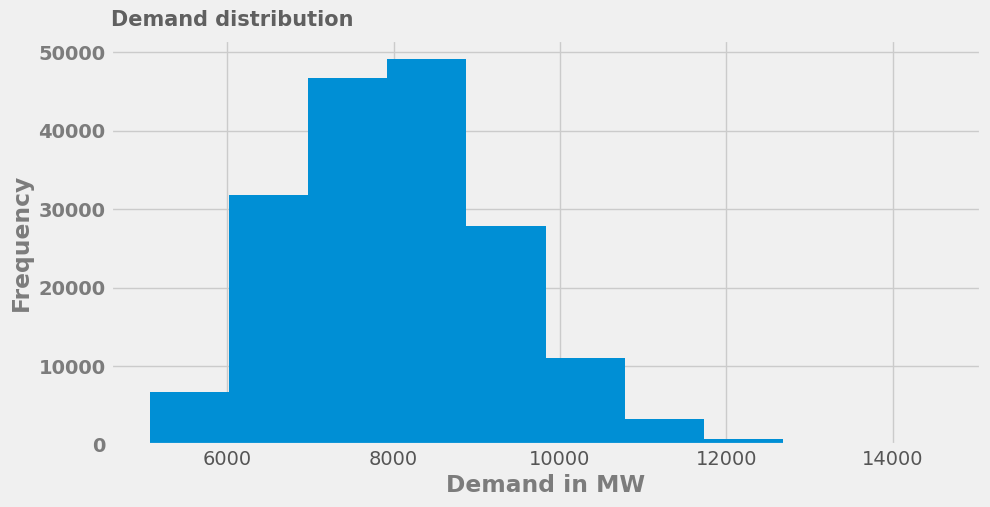

In [ ]:
ax, fig = plt.subplots(figsize=(10,5))

plt.hist(nswdemand_full["TOTALDEMAND"])

plt.yticks(alpha=0.75, weight="bold")

plt.xlabel("Demand in MW",alpha=0.75, weight="bold")
plt.ylabel("Frequency",alpha=0.75, weight="bold")

plt.title("Demand distribution", alpha=0.60, weight="bold", fontsize=15, loc="left", pad=10)

The distribution plot is slightly left-skewed, with the majority of the consumption moving around the 7000-9000 MW range.

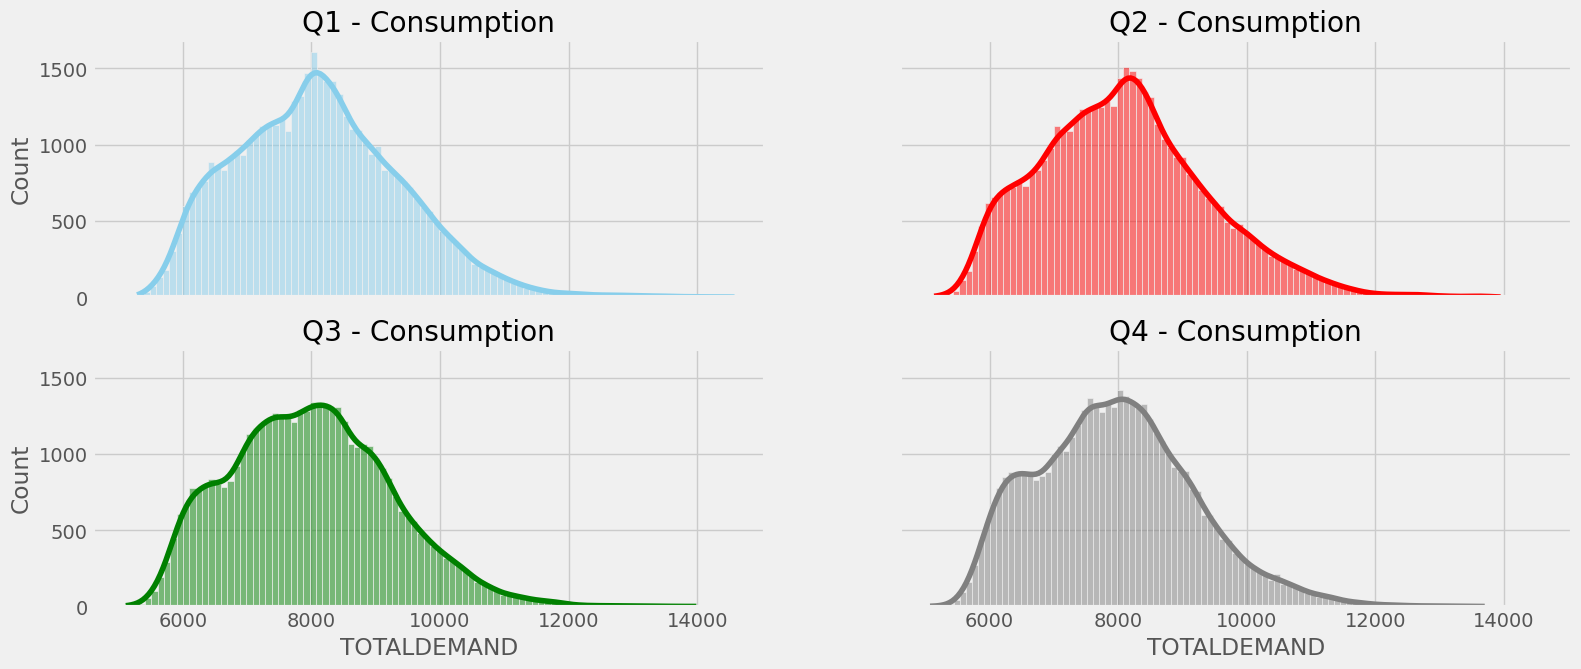

In [ ]:
#Data prep
Q1 = nswdemand_full[nswdemand_full["Q"]==1]
Q2 = nswdemand_full[nswdemand_full["Q"]==2]
Q3 = nswdemand_full[nswdemand_full["Q"]==3]
Q4 = nswdemand_full[nswdemand_full["Q"]==4]

#Plot
fig,axes = plt.subplots(2,2,figsize=(17,7),sharex=True,sharey=True)

sns.histplot(Q1["TOTALDEMAND"],color="skyblue", ax=axes[0,0], kde=True).set_title("Q1 - Consumption")
sns.histplot(Q2["TOTALDEMAND"],color="red", ax=axes[0,1], kde=True).set_title("Q2 - Consumption")
sns.histplot(Q3["TOTALDEMAND"],color="green", ax=axes[1,0], kde=True).set_title("Q3 - Consumption")
sns.histplot(Q4["TOTALDEMAND"],color="gray", ax=axes[1,1], kde=True).set_title("Q4 - Consumption")

del Q1, Q2, Q3, Q4

There are some major differences in the demand distribution per quarter. This might be due to several factors, the most obvious being seasonal demand changes. Another major factor is the general temperature in the area. Higher temperatures encourage more electricity usage as office buildings and homes require cooling.

Text(0.0, 1.0, 'Mean daily demand')

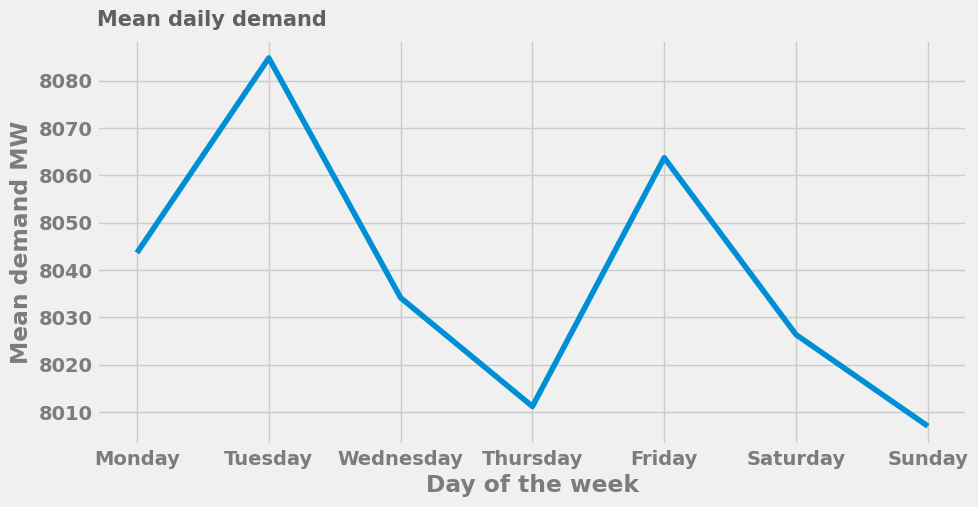

In [ ]:
#Data prep
mean_per_day = nswdemand_full.groupby("Day")["TOTALDEMAND"].agg(["mean"])

#Plot
fig, ax = plt.subplots(figsize=(10,5))


plt.plot(mean_per_day.index,mean_per_day["mean"])

plt.xticks(mean_per_day.index, ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"], alpha=0.75, weight="bold")
plt.yticks(alpha=0.75, weight="bold")

plt.xlabel("Day of the week",alpha=0.75, weight="bold")
plt.ylabel("Mean demand MW",alpha=0.75, weight="bold")

plt.title("Mean daily demand", alpha=0.60, weight="bold", fontsize=15, loc="left", pad=10)

#del mean_per_day

The plot above showcases the cumulative consumption per day. We can very clearly see that days matter when it comes to consumption. The lowest usage is usually marked on the weekends as most commercial and industrial areas stay closed reducing the overall consumption of the area. Suprisingly we also see that Thursday seems to have less energy consumption than the Saturday.

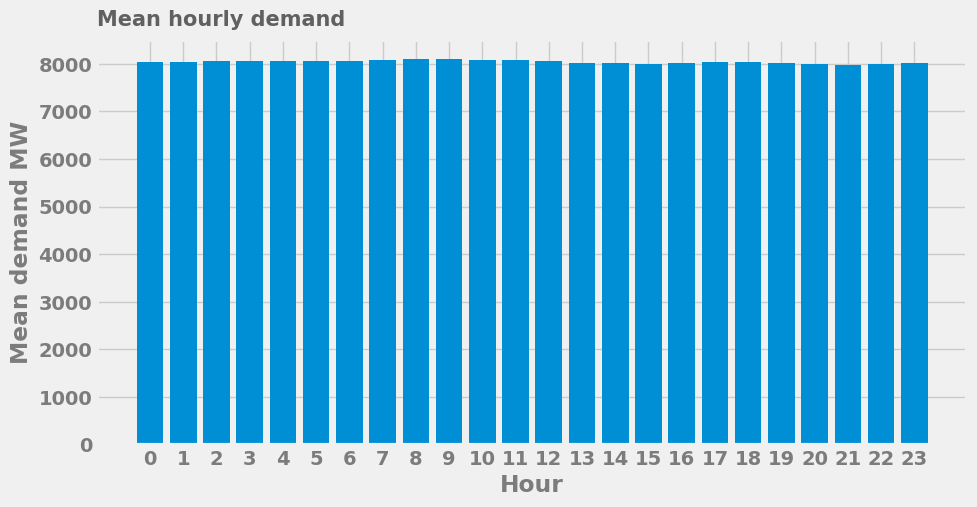

In [ ]:
#Data
mean_per_hour = nswdemand_full.groupby("Hour")["TOTALDEMAND"].agg(["mean"])

#Plot
fig, ax = plt.subplots(figsize=(10,5))

plt.bar(mean_per_hour.index, mean_per_hour["mean"])

plt.xticks(range(24),alpha=0.75, weight="bold")
plt.yticks(alpha=0.75, weight="bold")

plt.xlabel("Hour",alpha=0.75, weight="bold")
plt.ylabel("Mean demand MW",alpha=0.75, weight="bold")

plt.title("Mean hourly demand", alpha=0.60, weight="bold", fontsize=15, loc="left", pad=10)

del mean_per_hour

Text(0.0, 1.0, 'Demand over time')

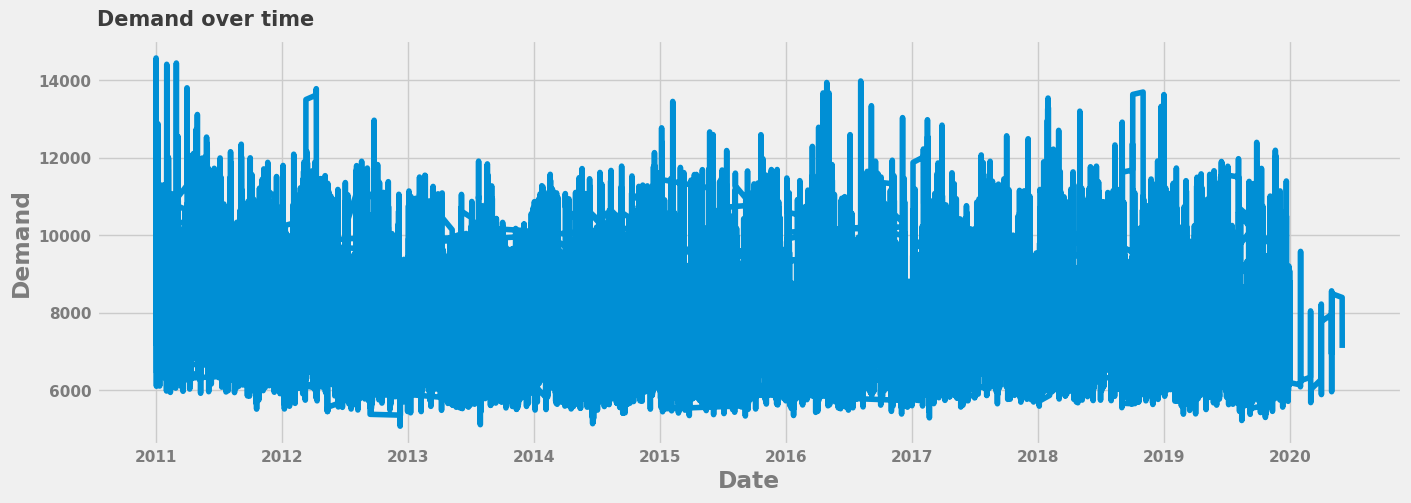

In [ ]:
fig,ax = plt.subplots(figsize=(15,5))

plt.plot(nswdemand_full.index,nswdemand_full["TOTALDEMAND"])

plt.xlabel("Date", alpha=0.75, weight="bold")
plt.ylabel("Demand", alpha=0.75, weight="bold")

plt.xticks(alpha=0.75,weight="bold", fontsize=11)
plt.yticks(alpha=0.75,weight="bold", fontsize=11)

plt.title("Demand over time", alpha=0.75, weight="bold", fontsize=15, pad=10, loc="left")

Looking at the consumption data as a whole we can very clearly see a pattern with peaks and valleys. While the baseline consumption stayed pretty much the same on around 8000 MW.

In [ ]:
#Specifying start and end dates
start_mth = datetime.datetime(2011,1,1)
end_mth = datetime.datetime(2020,12,1)
nswdemand_full = nswdemand_full[ ( nswdemand_full['DATETIME']>=start_mth) & (nswdemand_full['DATETIME']<= end_mth)]

In [ ]:
#Mean daily demand by year
nswdemand_full.index = nswdemand_full.DATETIME
# Group by year and find mean of the 'demand' column
nswdemand_full_year = nswdemand_full.groupby(pd.Grouper(key='DATETIME', freq='Y'))['TOTALDEMAND'].mean()
nswdemand_full_year

NameError: name 'nswdemand_full' is not defined

In [ ]:
#Plot line chart
nswdemand_full_year.plot(x='DATETIME', y='TOTALDEMAND',kind ='line', marker='o', figsize=(18,8))
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
plt.title('Average NSW Electricity Demand by Year from 2011 to 2020')
plt.xlabel('Year')
plt.ylabel('Total Demand MW')
plt.grid(True)
plt.legend(title='Year', loc='best')
plt.show()

In [ ]:
#Mean daily demand by month
nswdemand_full.index = nswdemand_full.DATETIME
# Group by month and find mean of the 'demand' column
nswdemand_full_mth = nswdemand_full.groupby(pd.Grouper(key='DATETIME', freq='M'))['TOTALDEMAND'].mean()
nswdemand_full['DATETIME']


DATETIME
2011-01-01 00:00:00   2011-01-01 00:00:00
2011-01-01 00:00:00   2011-01-01 00:00:00
2011-01-01 00:30:00   2011-01-01 00:30:00
2011-01-01 01:00:00   2011-01-01 01:00:00
2011-01-01 01:30:00   2011-01-01 01:30:00
                              ...        
2020-06-01 03:00:00   2020-06-01 03:00:00
2020-06-01 03:30:00   2020-06-01 03:30:00
2020-06-01 04:00:00   2020-06-01 04:00:00
2020-06-01 04:30:00   2020-06-01 04:30:00
2020-06-01 05:00:00   2020-06-01 05:00:00
Name: DATETIME, Length: 177508, dtype: datetime64[ns]

In [ ]:
nswdemand_full_mth

DATETIME
2011-01-31    8825.307744
2011-02-28    8610.636524
2011-03-31    8560.771656
2011-04-30    9186.535736
2011-05-31    9202.424027
                 ...     
2020-02-29    7531.972308
2020-03-31    6960.627708
2020-04-30    7002.901346
2020-05-31    7506.702639
2020-06-30    7623.398182
Freq: M, Name: TOTALDEMAND, Length: 114, dtype: float64

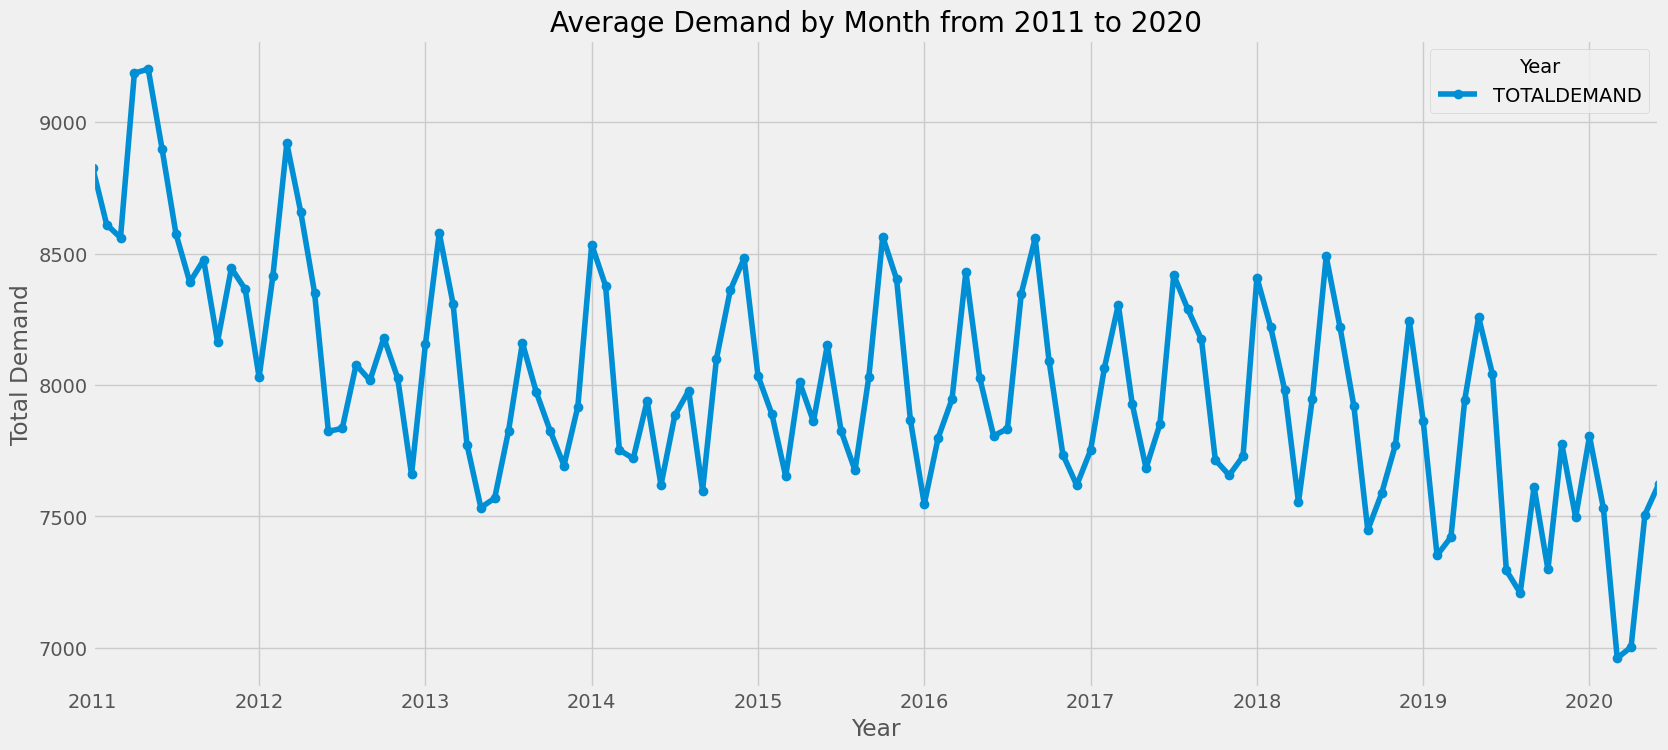

In [ ]:
#Plot line chart
nswdemand_full_mth.plot(x='DATETIME', y='TOTALDEMAND',kind ='line', marker='o', figsize=(18,8))
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
plt.title('Average NSW Electricity Demand by Month from 2011 to 2020')
plt.xlabel('Year')
plt.ylabel('Total Demand MW')
plt.grid(True)
plt.legend(title='Year', loc='best')
plt.show()

From the graph above, we can clearly see that there is a overall decreasing trend from 2011 to 2020. Let's take a closer look at one of years e.g. 2015

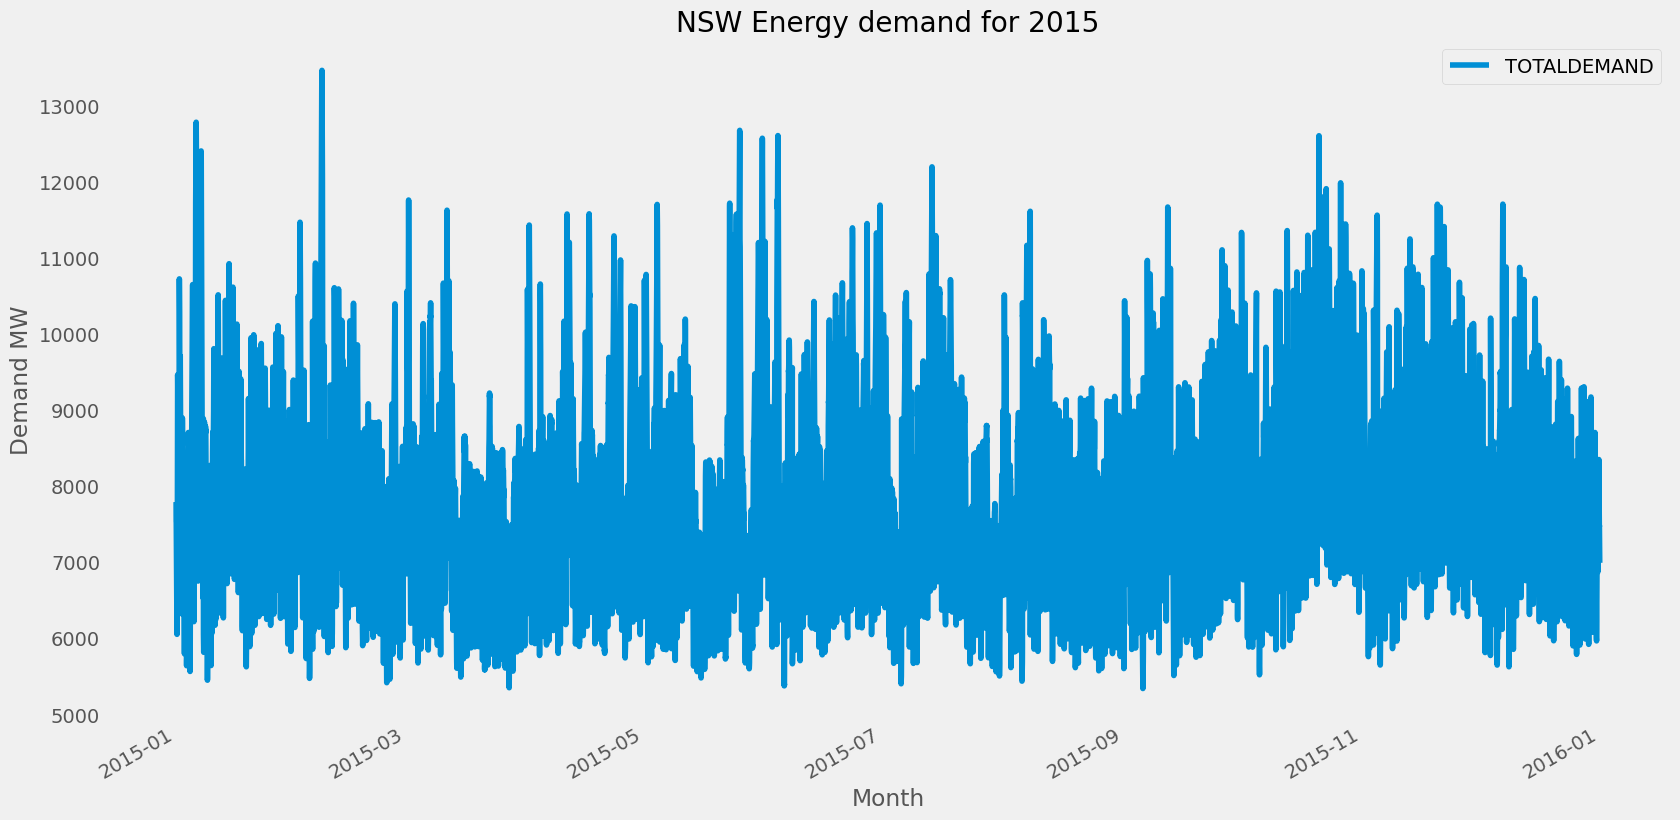

In [ ]:
nswdemand_full['2015-01-01':'2015-12-31'].plot(x='DATETIME',y='TOTALDEMAND')
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (18,10)
plt.title('NSW Energy demand for 2015')
plt.grid()
plt.xlabel('Month')
plt.ylabel('Demand MW')
plt.show()

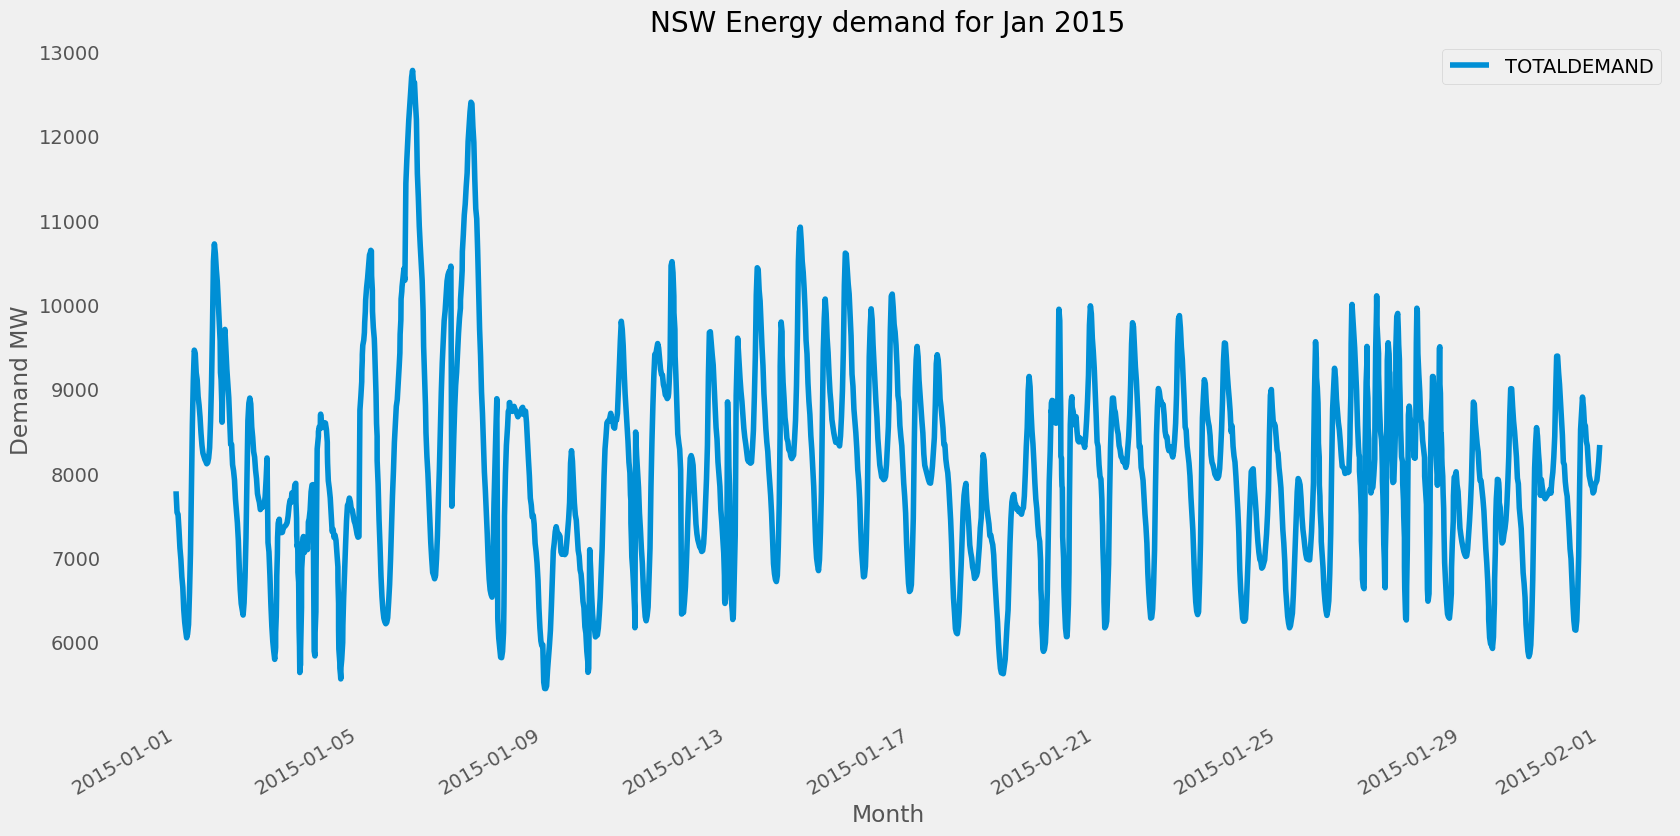

In [ ]:
nswdemand_full['2015-01-01':'2015-01-31'].plot(x='DATETIME',y='TOTALDEMAND')
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (18,10)
plt.title('NSW Energy demand for Jan 2015')
plt.grid()
plt.xlabel('Month')
plt.ylabel('Demand MW')
plt.show()

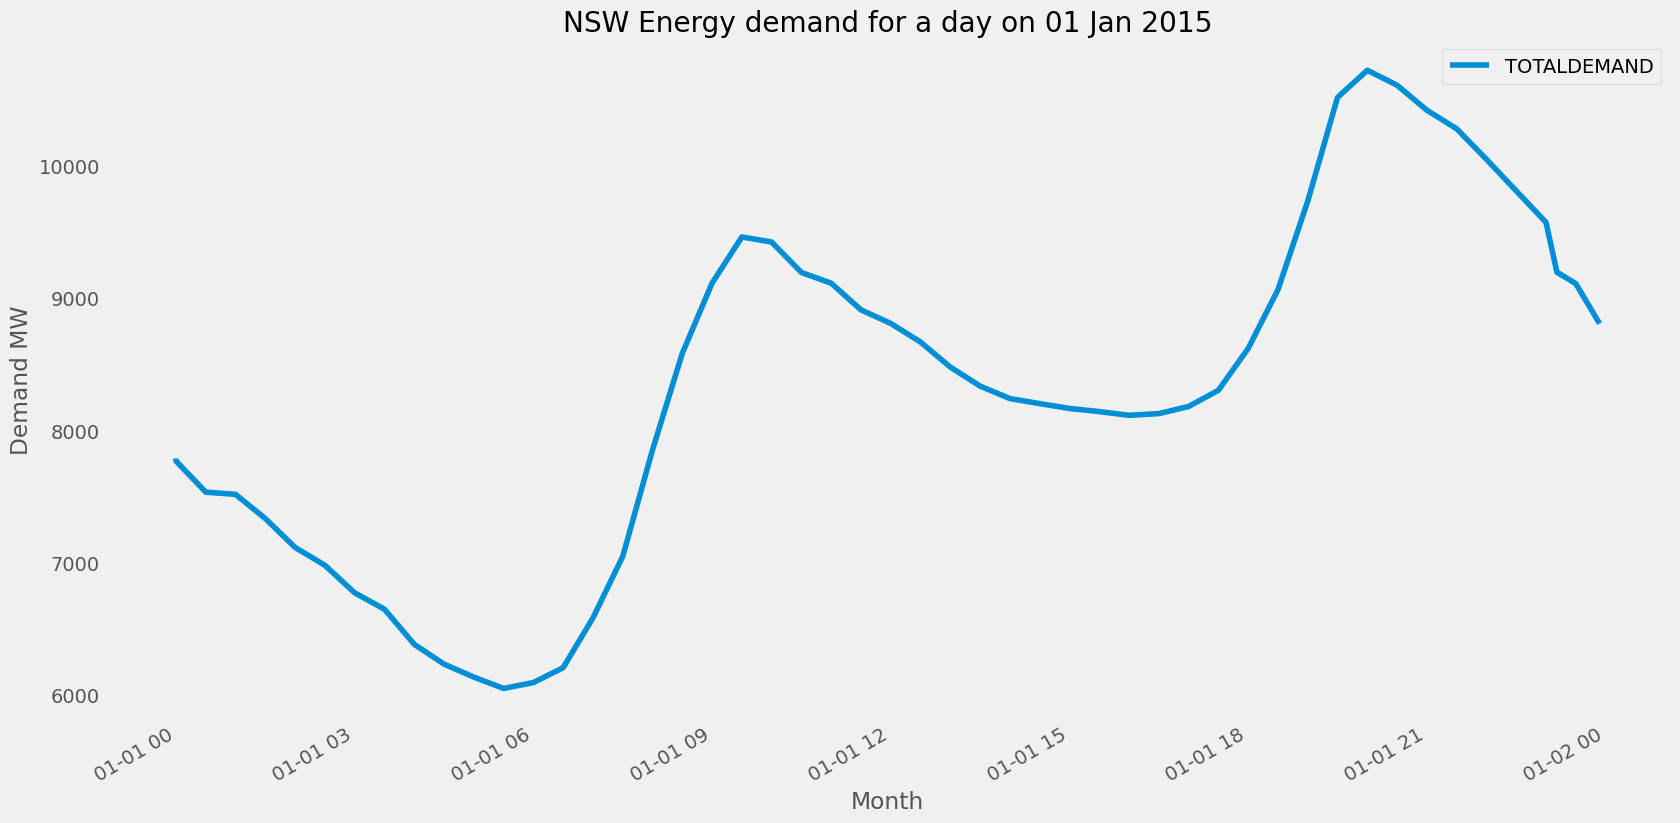

In [ ]:
nswdemand_full['2015-01-01':'2015-01-01'].plot(x='DATETIME',y='TOTALDEMAND')
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (18,10)
plt.title('NSW Energy demand for a day on 01 Jan 2015')
plt.grid()
plt.xlabel('Month')
plt.ylabel('Demand MW')
plt.show()

In [ ]:
#test